# Discretization of wave equation

# 1.1 B(i)

Set parameters

In [52]:
import numpy as np
import matplotlib as plt

#Length of string
L = 1

#Constant 
C = 1

#Number of x intervals
Nx = 100

#x discretization
x = np.linspace(0, L, Nx+1)
dx = float(L)/Nx
print(dx)

#Number of t intervals
Nt = 1000

#Time step length
dt = 0.01

iterations = 10

C2 = (C*dt/dx)**2
print(C2)


0.01
1.0


In [57]:
def I(x):
    return np.sin(2*np.pi*x)

u_2 = []
for i in range(0, Nx+1):
    u = I(x[i])  
    u_2.append(u)
u_2[Nx] = 0


#Initial conditions
u_1 = []
for i in range(0, Nx+1):
    u = I(x[i])  #I is the initial condition function, will be different for each problem
    u_1.append(u)
u_1[Nx] = 0


#We have already determined the states at t=0 for all x
#Want to calculate the first step, but to do this we need to incorporate the first derivative initial conditon
'''u_0 = [0]
for i in range(1, Nx):
    u = u_1[i] - (0.5)*C2*(u_1[i+1] - 2*u_1[i] + u_1[i-1])
    u_0.append(u)
u_0.append(0)'''

states_for_each_time = [u_2, u_1]


for n in range(1, Nt):
    #print(n)
    u_list = [0]
    for i in range(1, Nx):
        u_new = 2*states_for_each_time[n][i] - states_for_each_time[n-1][i] + ((C*dt/dx)**2)*(states_for_each_time[n][i-1] - 2*states_for_each_time[n][i] + states_for_each_time[n][i+1])
        u_list.append(u_new)
    u_list.append(0)
    states_for_each_time.append(u_list)
    
    

In [54]:
print(len(states_for_each_time))

1001


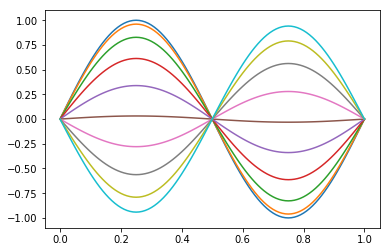

In [76]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.plot(x, states_for_each_time[i*5])
    

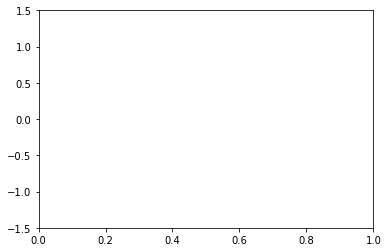

In [66]:
from matplotlib import animation
%matplotlib inline
plt.ion()

states_for_each_time[i]

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-1.5, 1.5))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, L, Nx+1)
    y = states_for_each_time[i]
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=2, blit=True)

#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

